In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from matplotlib import rcParams
#rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df = pd.read_csv('../prouni/~data/PDA_PROUNI_2005_CSV.csv', error_bad_lines=True, sep=';', encoding='latin-1')

In [13]:
df.dtypes

ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOLSA            object
SEXO_BENEFICIARIO_BOLSA           object
RACA_BENEFICIARIO_BOLSA           object
DT_NASCIMENTO_BENEFICIARIO        object
BENEFICIARIO_DEFICIENTE_FISICO    object
REGIAO_BENEFICIARIO_BOLSA         object
SIGLA_UF_BENEFICIARIO_BOLSA       object
MUNICIPIO_BENEFICIARIO_BOLSA      object
dtype: object

In [14]:
# Calculando idade dos participantes
df['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(df.DT_NASCIMENTO_BENEFICIARIO)
df['Person_Age'] = df['ANO_CONCESSAO_BOLSA'] - df['DT_NASCIMENTO_BENEFICIARIO'].dt.year

In [19]:
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Person_Age
0,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Integral,***264740**,Feminino,Branca,1987-02-17,NÃO,SUL,RS,SANTO ÂNGELO,18
1,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Serviço Social,Noturno,***976940**,Feminino,Parda,1986-06-14,NÃO,SUL,RS,FREDERICO WESTPHALEN,19
2,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Serviço Social,Noturno,***045340**,Feminino,Parda,1984-06-03,NÃO,SUL,RS,FREDERICO WESTPHALEN,21
3,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciência Da Computação,Noturno,***988420**,Masculino,Branca,1987-10-19,NÃO,SUL,RS,FREDERICO WESTPHALEN,18
4,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciência Da Computação,Noturno,***378080**,Masculino,Amarela,1987-07-20,NÃO,SUL,RS,FREDERICO WESTPHALEN,18


In [20]:
df.TIPO_BOLSA.unique()

array(['BOLSA PARCIAL 50%', 'BOLSA INTEGRAL'], dtype=object)

In [22]:
df['TIPO_BOLSA_NUM'] = df.TIPO_BOLSA.map({'BOLSA PARCIAL 50%': 0, 'BOLSA INTEGRAL': 1})

In [23]:
df.MODALIDADE_ENSINO_BOLSA.unique()

array(['PRESENCIAL', 'EDUCAÇÃO A DISTÂNCIA'], dtype=object)

In [24]:
df['MODALIDADE_ENSINO_BOLSA_NUM'] = df.MODALIDADE_ENSINO_BOLSA.map({'PRESENCIAL': 0, 'EDUCAÇÃO A DISTÂNCIA': 1})

In [25]:
df.SEXO_BENEFICIARIO_BOLSA.unique()

array(['Feminino', 'Masculino'], dtype=object)

In [26]:
df['SEXO_BENEFICIARIO_BOLSA_NUM'] = df.SEXO_BENEFICIARIO_BOLSA.map({'Feminino': 0, 'Masculino': 1})

In [27]:
df.BENEFICIARIO_DEFICIENTE_FISICO.unique()

array(['NÃO', 'SIM'], dtype=object)

In [28]:
df['BENEFICIARIO_DEFICIENTE_FISICO_NUM'] = df.BENEFICIARIO_DEFICIENTE_FISICO.map({'NÃO': 0, 'SIM': 1})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95629 entries, 0 to 95628
Data columns (total 20 columns):
ANO_CONCESSAO_BOLSA                   95629 non-null int64
CODIGO_EMEC_IES_BOLSA                 95629 non-null int64
NOME_IES_BOLSA                        95312 non-null object
TIPO_BOLSA                            95629 non-null object
MODALIDADE_ENSINO_BOLSA               95629 non-null object
NOME_CURSO_BOLSA                      94461 non-null object
NOME_TURNO_CURSO_BOLSA                95629 non-null object
CPF_BENEFICIARIO_BOLSA                95629 non-null object
SEXO_BENEFICIARIO_BOLSA               95629 non-null object
RACA_BENEFICIARIO_BOLSA               95629 non-null object
DT_NASCIMENTO_BENEFICIARIO            95629 non-null datetime64[ns]
BENEFICIARIO_DEFICIENTE_FISICO        95629 non-null object
REGIAO_BENEFICIARIO_BOLSA             95363 non-null object
SIGLA_UF_BENEFICIARIO_BOLSA           95363 non-null object
MUNICIPIO_BENEFICIARIO_BOLSA          95363 n

In [40]:
#prouni_2005 = '../prouni/~data/'
#data = pd.read_csv(prouni_2005, error_bad_lines=True, sep=';', encoding='latin-1')
# Importing and concatenating our datasets

filenames = glob('../prouni/~data/PDA_PROUNI*.csv')

df = [pd.read_csv(f, error_bad_lines=True, sep=';', encoding='latin-1') for f in filenames]
df = pd.concat(df, ignore_index=True)

In [41]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 15

In [44]:
# Calculando idade dos participantes
df['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(df.DT_NASCIMENTO_BENEFICIARIO)
df['Person_Age'] = df['ANO_CONCESSAO_BOLSA'] - df['DT_NASCIMENTO_BENEFICIARIO'].dt.year

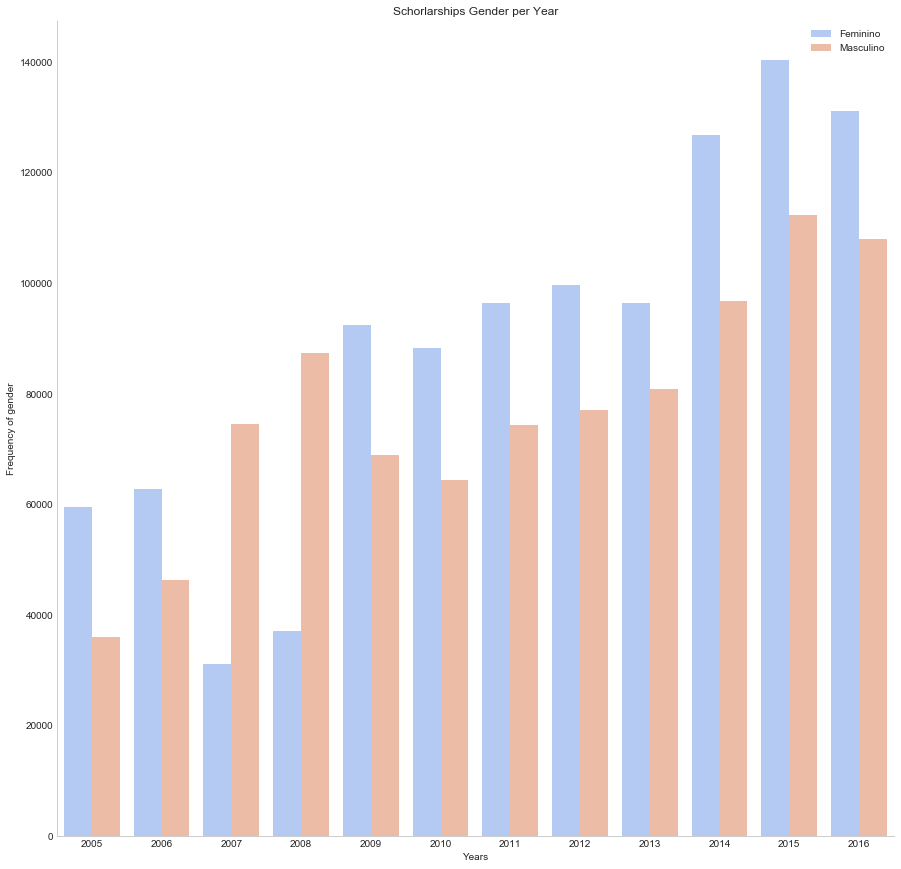

In [42]:
#Scholarship Gender per Year
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA', data=df, palette='coolwarm')
plt.ylabel('Frequency of gender')
plt.xlabel('Years')
plt.title('Schorlarships Gender per Year')
plt.legend(loc=0, title=None)
plt.grid(False)
sns.despine()
plt.show()

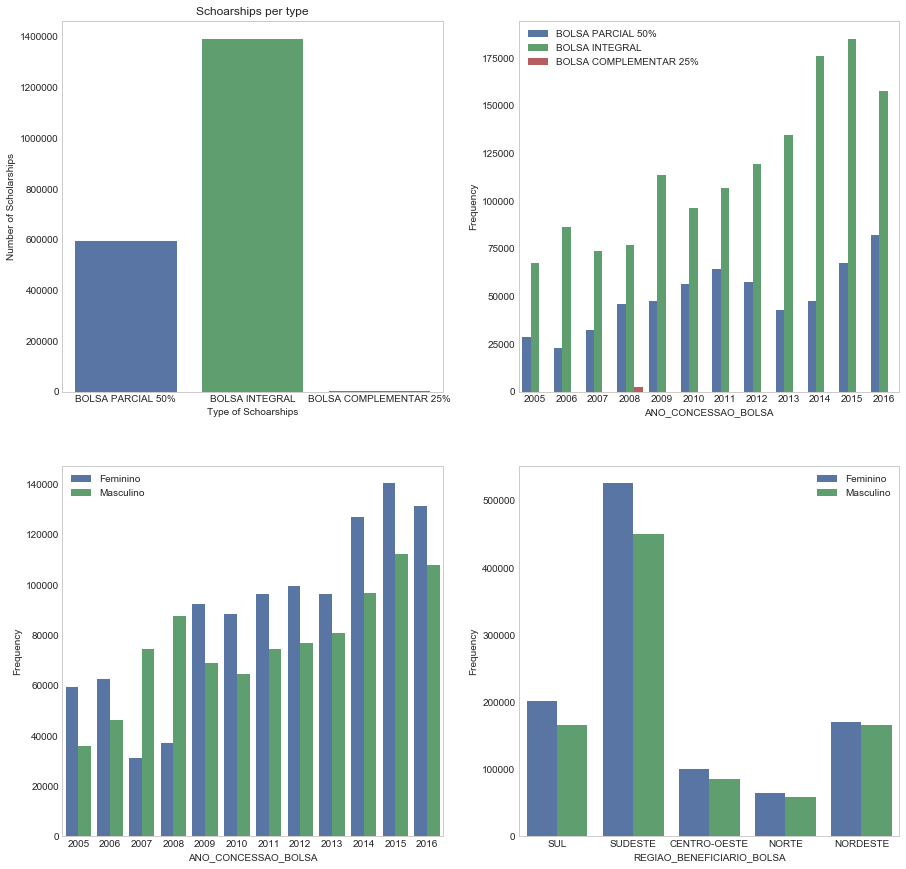

In [43]:
plt.subplot(2, 2, 1)
sns.countplot(x='TIPO_BOLSA', data=df, palette='deep')
plt.title('Schoarships per type')
plt.ylabel('Number of Scholarships')
plt.xlabel('Type of Schoarships')
plt.grid(False)


plt.subplot(2, 2, 2)
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='TIPO_BOLSA' , data=df, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)

plt.subplot(2, 2, 3)
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA' , data=df, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)

plt.subplot(2, 2, 4)
sns.countplot(x='REGIAO_BENEFICIARIO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA' , data=df, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)


plt.show()

In [53]:
df.DT_NASCIMENTO_BENEFICIARIO.dt.year.unique()

array([1987, 1986, 1984, 1985, 1988, 1978, 1976, 1957, 1983, 1979, 1980,
       1967, 1977, 1981, 1982, 1974, 1969, 1973, 1971, 1975, 1964, 1972,
       1992, 1962, 1968, 1966, 1970, 1960, 1963, 1961, 1953, 1955, 1949,
       1965, 1959, 1954, 1956, 2004, 1946, 1950, 1958, 1997, 2005, 1948,
       1943, 1951, 1938, 1952, 1945, 2007, 1942, 2003, 2087, 1998, 1995,
       2001, 1993, 1996, 2067, 2071, 2068, 2075, 1947, 1989, 2078, 1941,
       1999, 2006, 1990, 2069, 1937, 1916, 1994, 2074, 2080, 1932, 1939,
       1933, 2066, 1935, 1927, 1940, 1925, 1944, 2060, 2077, 1884, 1897,
       1923, 1936, 2081, 2065, 1887, 1921, 1900, 1929, 1991, 1919, 1930,
       1905, 1922, 2000, 2019, 2002, 1910, 1911, 2079, 1934, 1904, 2073,
       1917, 2008, 1931, 1908, 2072, 1926, 1901, 2009, 2010, 2011, 2012,
       2059, 1871, 2013, 1898, 2015], dtype=int64)

In [55]:
df[df.DT_NASCIMENTO_BENEFICIARIO.dt.year() = 1884]

SyntaxError: invalid syntax (<ipython-input-55-1f1f70deb7f4>, line 1)

# Iniciando testes com a base de dados

In [11]:
train = df.sample(100)
train.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
470906,2009,216,CENTRO UNIVERSITÁRIO METODISTA IZABELA HENDRIX,BOLSA INTEGRAL,PRESENCIAL,Pedagogia,Noturno,***508876**,Feminino,Branca,03-02-1987,NÃO,SUDESTE,MG,BELO HORIZONTE
1604041,2015,449,UNIVERSIDADE LUTERANA DO BRASIL,BOLSA INTEGRAL,PRESENCIAL,Engenharia De Produção,Noturno,***276210**,Feminino,Branca,13-10-1992,NÃO,SUL,RS,CARAZINHO
1700503,2015,1255,FACULDADE BOA VIAGEM,BOLSA PARCIAL 50%,PRESENCIAL,Comunicação Social - Publicidade E Propaganda,Noturno,***165654**,Masculino,Parda,03-12-1990,NÃO,NORDESTE,PE,CABO DE SANTO AGOSTINHO
1472793,2014,3875,CENTRO UNIVERSITÁRIO DA FUNDAÇÃO EDUCACIONAL G...,BOLSA INTEGRAL,PRESENCIAL,Administração,Noturno,***516806**,Feminino,Branca,13-12-1993,NÃO,SUDESTE,MG,ITAMOGI
259700,2007,19512,INSTITUTO MASTER DE ENSINO PRESIDENTE ANTÔNIO ...,BOLSA INTEGRAL,PRESENCIAL,Nutrição,Noturno,***906666**,Feminino,Branca,29-12-1989,NÃO,SUDESTE,MG,ARAGUARI


In [14]:
train['SEX_NUM'] = train.SEXO_BENEFICIARIO_BOLSA.map({'Feminino': 0, 'Masculino': 1})

In [15]:
train.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,SEX_NUM
470906,2009,216,CENTRO UNIVERSITÁRIO METODISTA IZABELA HENDRIX,BOLSA INTEGRAL,PRESENCIAL,Pedagogia,Noturno,***508876**,Feminino,Branca,03-02-1987,NÃO,SUDESTE,MG,BELO HORIZONTE,0
1604041,2015,449,UNIVERSIDADE LUTERANA DO BRASIL,BOLSA INTEGRAL,PRESENCIAL,Engenharia De Produção,Noturno,***276210**,Feminino,Branca,13-10-1992,NÃO,SUL,RS,CARAZINHO,0
1700503,2015,1255,FACULDADE BOA VIAGEM,BOLSA PARCIAL 50%,PRESENCIAL,Comunicação Social - Publicidade E Propaganda,Noturno,***165654**,Masculino,Parda,03-12-1990,NÃO,NORDESTE,PE,CABO DE SANTO AGOSTINHO,1
1472793,2014,3875,CENTRO UNIVERSITÁRIO DA FUNDAÇÃO EDUCACIONAL G...,BOLSA INTEGRAL,PRESENCIAL,Administração,Noturno,***516806**,Feminino,Branca,13-12-1993,NÃO,SUDESTE,MG,ITAMOGI,0
259700,2007,19512,INSTITUTO MASTER DE ENSINO PRESIDENTE ANTÔNIO ...,BOLSA INTEGRAL,PRESENCIAL,Nutrição,Noturno,***906666**,Feminino,Branca,29-12-1989,NÃO,SUDESTE,MG,ARAGUARI,0


In [8]:
#Checking null values
percent = df.isnull().sum()/ len(df) *100
percent.sort_values(ascending = False)

NOME_CURSO_BOLSA                  0.284218
NOME_IES_BOLSA                    0.024581
MUNICIPIO_BENEFICIARIO_BOLSA      0.020208
SIGLA_UF_BENEFICIARIO_BOLSA       0.020208
REGIAO_BENEFICIARIO_BOLSA         0.020208
BENEFICIARIO_DEFICIENTE_FISICO    0.000000
DT_NASCIMENTO_BENEFICIARIO        0.000000
RACA_BENEFICIARIO_BOLSA           0.000000
SEXO_BENEFICIARIO_BOLSA           0.000000
CPF_BENEFICIARIO_BOLSA            0.000000
NOME_TURNO_CURSO_BOLSA            0.000000
MODALIDADE_ENSINO_BOLSA           0.000000
TIPO_BOLSA                        0.000000
CODIGO_EMEC_IES_BOLSA             0.000000
ANO_CONCESSAO_BOLSA               0.000000
dtype: float64

# Playing with the dataset

In [4]:
train = df.sample(100)
train.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
1956061,2016,2571,FACULDADE REDENTOR,BOLSA INTEGRAL,PRESENCIAL,Engenharia Civil,Noturno,***328256**,Feminino,Branca,05-07-1995,NÃO,SUDESTE,MG,MURIAÉ
53429,2005,1461,FACULDADE DE TECNOLOGIA E CIÊNCIAS,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Geografia,Curso a distância,***830015**,Masculino,Branca,08-10-1984,NÃO,NORDESTE,BA,SALVADOR
1165922,2013,4010,CENTRO UNIVERSITÁRIO METODISTA,BOLSA INTEGRAL,PRESENCIAL,Turismo,Noturno,***201040**,Feminino,Branca,27-05-1993,NÃO,SUL,RS,PORTO ALEGRE
302605,2007,891,FACULDADE PITÁGORAS,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Matutino,***492456**,Masculino,Branca,12-05-1983,NÃO,SUDESTE,MG,CONTAGEM
600538,2010,671,UNIVERSIDADE ANHANGUERA - UNIDERP,BOLSA INTEGRAL,PRESENCIAL,Nutrição,Matutino,***912111**,Feminino,Branca,18-09-1992,NÃO,CENTRO-OESTE,MS,CAMPO GRANDE


In [38]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 15

In [5]:
train.ANO_CONCESSAO_BOLSA.unique()

array([2016, 2005, 2013, 2007, 2010, 2014, 2011, 2008, 2006, 2012, 2009,
       2015], dtype=int64)

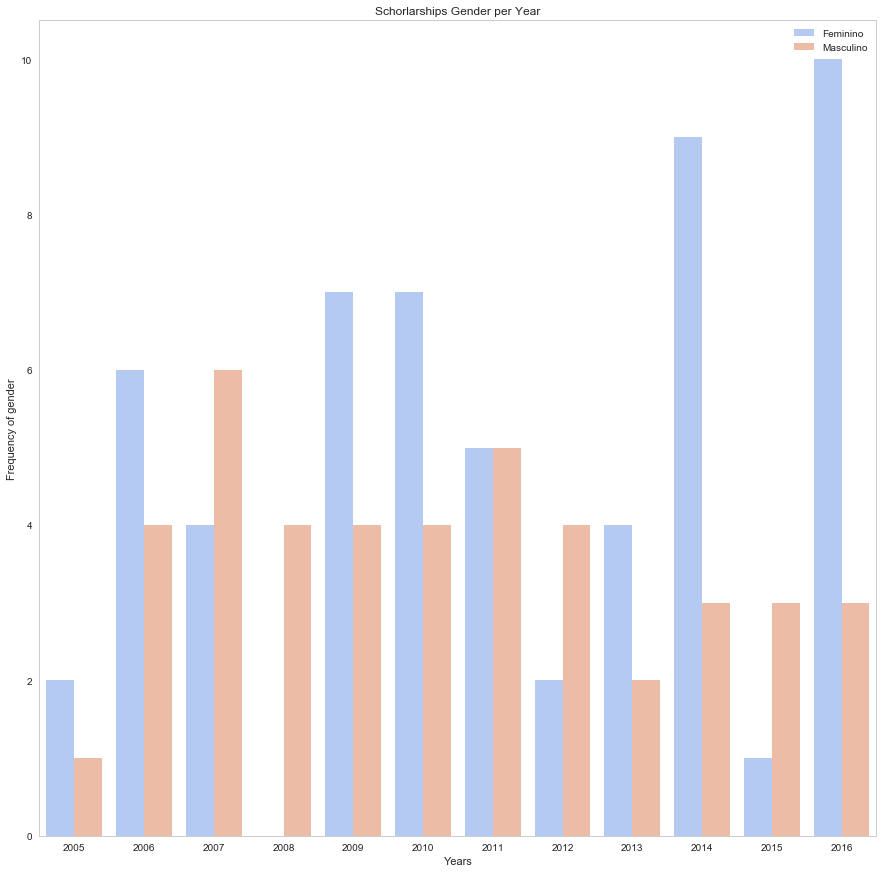

In [39]:
#Scholarship Gender per Year
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA', data=train, palette='coolwarm')
plt.ylabel('Frequency of gender')
plt.xlabel('Years')
plt.title('Schorlarships Gender per Year')
plt.legend(loc=0, title=None)
plt.grid(False)
#sns.despine()
plt.show()

In [9]:
train.columns

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA'],
      dtype='object')

In [12]:
train.SIGLA_UF_BENEFICIARIO_BOLSA.value_counts()

SP    34
MG    12
PR     7
BA     6
RS     5
RJ     4
AM     4
CE     3
SC     3
AL     2
MA     2
PI     2
MS     2
AC     2
GO     2
MT     2
DF     1
PE     1
RN     1
TO     1
PA     1
AP     1
SE     1
ES     1
Name: SIGLA_UF_BENEFICIARIO_BOLSA, dtype: int64

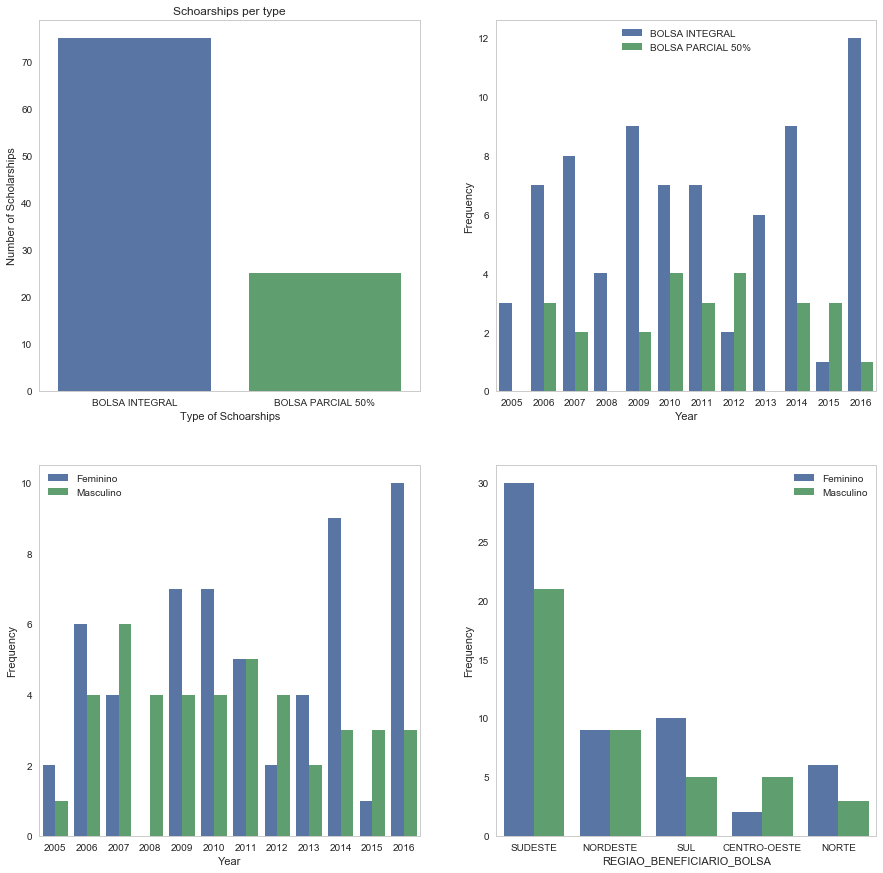

In [46]:
plt.subplot(2, 2, 1)
sns.countplot(x='TIPO_BOLSA', data=train, palette='deep')
plt.title('Schoarships per type')
plt.ylabel('Number of Scholarships')
plt.xlabel('Type of Schoarships')
plt.grid(False)


plt.subplot(2, 2, 2)
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='TIPO_BOLSA' , data=train, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)

plt.subplot(2, 2, 3)
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA' , data=train, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)

plt.subplot(2, 2, 4)
sns.countplot(x='REGIAO_BENEFICIARIO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA' , data=train, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)


plt.show()

In [41]:
gender = dataframes.SEXO_BENEFICIARIO_BOLSA
gender.value_counts()

NameError: name 'dataframes' is not defined

In [13]:
female = dataframes.SEXO_BENEFICIARIO_BOLSA == 'Feminino'
male   = dataframes.SEXO_BENEFICIARIO_BOLSA == 'Masculino'

In [15]:
femme_data = dataframes[female]
male_data = dataframes[male]

In [17]:
male_data.RACA_BENEFICIARIO_BOLSA.groupby(male_data.SEXO_BENEFICIARIO_BOLSA).value_counts()

SEXO_BENEFICIARIO_BOLSA  RACA_BENEFICIARIO_BOLSA
Masculino                Branca                     403817
                         Parda                      375653
                         Preta                      123641
                         Amarela                     14485
                         Não Informada                8261
                         Indígena                     1066
Name: RACA_BENEFICIARIO_BOLSA, dtype: int64

In [3]:
dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989317 entries, 0 to 239261
Data columns (total 15 columns):
ANO_CONCESSAO_BOLSA               int64
CODIGO_EMEC_IES_BOLSA             int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOLSA            object
SEXO_BENEFICIARIO_BOLSA           object
RACA_BENEFICIARIO_BOLSA           object
DT_NASCIMENTO_BENEFICIARIO        object
BENEFICIARIO_DEFICIENTE_FISICO    object
REGIAO_BENEFICIARIO_BOLSA         object
SIGLA_UF_BENEFICIARIO_BOLSA       object
MUNICIPIO_BENEFICIARIO_BOLSA      object
dtypes: int64(2), object(13)
memory usage: 242.8+ MB


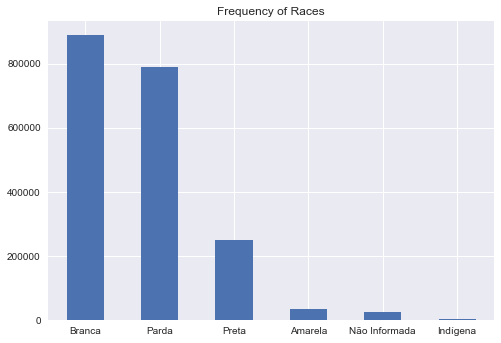

In [5]:
dataframes.RACA_BENEFICIARIO_BOLSA.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Frequency of Races')
plt.show()

In [8]:
dataframes.RACA_BENEFICIARIO_BOLSA.groupby(dataframes.SEXO_BENEFICIARIO_BOLSA).value_counts()

SEXO_BENEFICIARIO_BOLSA  RACA_BENEFICIARIO_BOLSA
Feminino                 Branca                     485020
                         Parda                      413279
                         Preta                      126754
                         Amarela                     20783
                         Não Informada               15338
                         Indígena                     1220
Masculino                Branca                     403817
                         Parda                      375653
                         Preta                      123641
                         Amarela                     14485
                         Não Informada                8261
                         Indígena                     1066
Name: RACA_BENEFICIARIO_BOLSA, dtype: int64

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# or replace the three lines of code above by the following line: 
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

# Plot the data
ax1.bar(dataframes.RACA_BENEFICIARIO_BOLSA.groupby(dataframes.SEXO_BENEFICIARIO_BOLSA).value_counts())
ax2.barh([0.5,1,2.5],[0,1,2])

# Show the plot
plt.show()

In [33]:
dataframes.SEXO_BENEFICIARIO_BOLSA.groupby(dataframes.REGIAO_BENEFICIARIO_BOLSA).value_counts()

REGIAO_BENEFICIARIO_BOLSA  SEXO_BENEFICIARIO_BOLSA
CENTRO-OESTE               Feminino                   100670
                           Masculino                   84830
NORDESTE                   Feminino                   169510
                           Masculino                  166388
NORTE                      Feminino                    64292
                           Masculino                   58653
SUDESTE                    Feminino                   525726
                           Masculino                  450382
SUL                        Feminino                   201970
                           Masculino                  166494
Name: SEXO_BENEFICIARIO_BOLSA, dtype: int64

In [9]:
dataframes.REGIAO_BENEFICIARIO_BOLSA.groupby(dataframes.SEXO_BENEFICIARIO_BOLSA).value_counts()

SEXO_BENEFICIARIO_BOLSA  REGIAO_BENEFICIARIO_BOLSA
Feminino                 SUDESTE                      525726
                         SUL                          201970
                         NORDESTE                     169510
                         CENTRO-OESTE                 100670
                         NORTE                         64292
Masculino                SUDESTE                      450382
                         SUL                          166494
                         NORDESTE                     166388
                         CENTRO-OESTE                  84830
                         NORTE                         58653
Name: REGIAO_BENEFICIARIO_BOLSA, dtype: int64

In [35]:
dataframes.REGIAO_BENEFICIARIO_BOLSA.loc[dataframes.REGIAO_BENEFICIARIO_BOLSA == 'CENTRO-OESTE'].value_counts()

CENTRO-OESTE    185500
Name: REGIAO_BENEFICIARIO_BOLSA, dtype: int64

In [10]:
dataframes.RACA_BENEFICIARIO_BOLSA.groupby([dataframes.SEXO_BENEFICIARIO_BOLSA, dataframes.REGIAO_BENEFICIARIO_BOLSA]).value_counts()

SEXO_BENEFICIARIO_BOLSA  REGIAO_BENEFICIARIO_BOLSA  RACA_BENEFICIARIO_BOLSA
Feminino                 CENTRO-OESTE               Parda                       50896
                                                    Branca                      31228
                                                    Preta                       13591
                                                    Amarela                      3542
                                                    Não Informada                1262
                                                    Indígena                      151
                         NORDESTE                   Parda                       98224
                                                    Branca                      33249
                                                    Preta                       31591
                                                    Amarela                      4382
                                                    Não Informad

In [ ]:
#dataframes.NOME_IES_BOLSA.unique
#dataframes.TIPO_BOLSA.unique
#dataframes.MODALIDADE_ENSINO_BOLSA.unique
#dataframes.NOME_CURSO_BOLSA.unique
#dataframes.NOME_TURNO_CURSO_BOLSA.unique
#dataframes.RACA_BENEFICIARIO_BOLSA.unique

In [13]:
dataframes.reset_index(drop=True)
dataframes.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Integral,***264740**,Feminino,Branca,17-02-1987,NÃO,SUL,RS,SANTO ÂNGELO
1,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Serviço Social,Noturno,***976940**,Feminino,Parda,14-06-1986,NÃO,SUL,RS,FREDERICO WESTPHALEN
2,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Serviço Social,Noturno,***045340**,Feminino,Parda,06-03-1984,NÃO,SUL,RS,FREDERICO WESTPHALEN
3,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciência Da Computação,Noturno,***988420**,Masculino,Branca,19-10-1987,NÃO,SUL,RS,FREDERICO WESTPHALEN
4,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciência Da Computação,Noturno,***378080**,Masculino,Amarela,20-07-1987,NÃO,SUL,RS,FREDERICO WESTPHALEN


In [14]:
dataframes.SEXO_BENEFICIARIO_BOLSA.groupby(dataframes.TIPO_BOLSA).value_counts()

TIPO_BOLSA              SEXO_BENEFICIARIO_BOLSA
BOLSA COMPLEMENTAR 25%  Masculino                    1382
                        Feminino                      948
BOLSA INTEGRAL          Feminino                   735967
                        Masculino                  656320
BOLSA PARCIAL 50%       Feminino                   325479
                        Masculino                  269221
Name: SEXO_BENEFICIARIO_BOLSA, dtype: int64

In [9]:
data.NOME_IES_BOLSA.unique()

array(['UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUAI E DAS MISSÕES',
       'PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ',
       'UNIVERSIDADE DE PASSO FUNDO', ...,
       'INSTITUTO DE ENSINO SUPERIOR DO OESTE PAULISTA',
       'FACULDADE DO NORTE PIONEIRO DE JACAREZINHO',
       'FACULDADE DE TECNOLOGIA SÃO CARLOS'], dtype=object)

In [10]:
data.TIPO_BOLSA.unique()

array(['BOLSA PARCIAL 50%', 'BOLSA INTEGRAL'], dtype=object)

In [11]:
data.MODALIDADE_ENSINO_BOLSA.unique()

array(['PRESENCIAL', 'EDUCAÇÃO A DISTÂNCIA'], dtype=object)

In [14]:
data.NOME_CURSO_BOLSA.unique()

array(['Enfermagem', 'Serviço Social', 'Ciência Da Computação',
       'Administração', 'Educação Física', 'Farmácia',
       'Engenharia Agrícola', 'Pedagogia', 'Sistemas De Informação',
       'Medicina Veterinária', 'Zootecnia', 'Negócios Imobiliários',
       'Pedagogia (Regime Especial)', 'Matemática',
       'Letras - Português E Inglês', 'Direito',
       'Publicidade E Propaganda', 'Química', 'Engenharia Civil',
       'Psicologia', 'Ciências Contábeis', 'Ciências Biológicas',
       'História', 'Letras - Português E Espanhol', 'Agronomia',
       'Engenharia De Alimentos', 'Fisioterapia', 'Geografia',
       'Arquitetura E Urbanismo', 'Processamento De Dados',
       'Estratégia De Negócios', 'Filosofia',
       'Curso Superior De Formação De Professores Para Educação Infantil E Séries Iniciais Do Ensino Fundamental',
       'Secretariado Executivo Bilíngue', 'Engenharia Mecânica',
       'Sistema De Informação',
       'Curso Superior De Tecnologia Em Meio Ambiente, Controle 

In [15]:
data.RACA_BENEFICIARIO_BOLSA.unique()

array(['Branca', 'Parda', 'Amarela', 'Não Informada', 'Preta', 'Indígena'], dtype=object)

In [19]:
%matplotlib inline

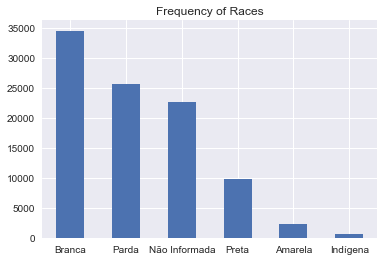

In [39]:
data.RACA_BENEFICIARIO_BOLSA.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Frequency of Races')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

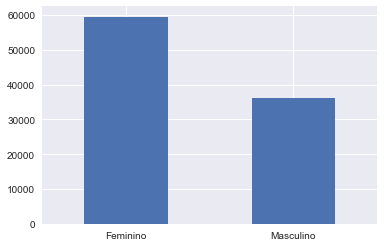

In [37]:
data.SEXO_BENEFICIARIO_BOLSA.value_counts().plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

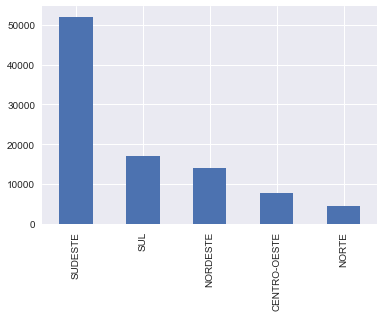

In [38]:
data.REGIAO_BENEFICIARIO_BOLSA.value_counts().plot(kind='bar')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

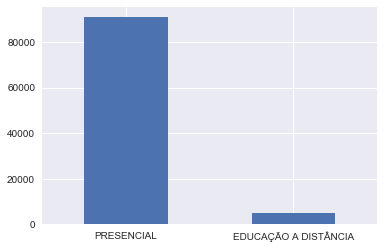

In [35]:
data.MODALIDADE_ENSINO_BOLSA.value_counts().plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

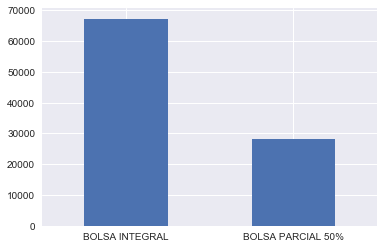

In [40]:
data.TIPO_BOLSA.value_counts().plot(kind='bar')
plt.xticks(rotation=0)